<a href="https://colab.research.google.com/github/gabrieldilay/NaoSupervisionadoCovid/blob/main/CovidNaoSupervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/drive/MyDrive/TrabNaoSupervisionado/2022-11-30_Casos_Covid_19_-_Base_de_Dados.csv',
                    sep=';', encoding='iso-8859-1')

In [5]:
df.head()

,DATA INCLUSÃO/ NOTIFICAÇÃO,CLASSIFICAÇÃO FINAL,IDADE (anos),SEXO,BAIRRO,DISTRITO RESIDÊNCIA,INTERNADO (SIM/NÃO),DATA COLETA EXAME,DATA ÓBITO,ENCERRAMENTO
0,11/03/2020,CONFIRMADO,54,M,CRISTO REI,DSMZ,NÃO,09/03/2020,NaN,RECUPERADO
1,12/03/2020,CONFIRMADO,15,M,XAXIM,DSBQ,NÃO,08/03/2020,NaN,RECUPERADO
2,12/03/2020,CONFIRMADO,43,M,XAXIM,DSBQ,NÃO,09/03/2020,NaN,RECUPERADO
3,12/03/2020,CONFIRMADO,25,F,CRISTO REI,DSMZ,NÃO,09/03/2020,NaN,RECUPERADO
4,12/03/2020,CONFIRMADO,58,M,MERCÊS,DSMZ,NÃO,09/03/2020,NaN,RECUPERADO


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543000 entries, 0 to 542999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   DATA INCLUSÃO/ NOTIFICAÇÃO  543000 non-null  object
 1   CLASSIFICAÇÃO FINAL         543000 non-null  object
 2   IDADE (anos)                543000 non-null  int64 
 3   SEXO                        543000 non-null  object
 4   BAIRRO                      532224 non-null  object
 5   DISTRITO RESIDÊNCIA         532223 non-null  object
 6   INTERNADO (SIM/NÃO)         543000 non-null  object
 7   DATA COLETA EXAME           543000 non-null  object
 8   DATA ÓBITO                  8539 non-null    object
 9   ENCERRAMENTO                543000 non-null  object
dtypes: int64(1), object(9)
memory usage: 41.4+ MB


## Limpeza e Tratamento dos dados

In [7]:
#Verificar os valores unicos da coluna CLASSIFICAÇÃO FINAL
df['CLASSIFICAÇÃO FINAL'].unique()

array(['CONFIRMADO'], dtype=object)

In [8]:
#Verificar os valores unicos da coluna ENCERRAMENTO
df['ENCERRAMENTO'].unique()

array(['RECUPERADO', 'ÓBITO CONF', 'ATIVO'], dtype=object)

In [9]:
#SUBSTITUIR OS VALORES POR NUMEROS
#RECUPERADO = 0, OBITO = 1, ATIVO = 2

df['ENCERRAMENTO'].replace({'RECUPERADO':0, 'ÓBITO CONF':1, 'ATIVO':2}, inplace=True)

In [10]:
df['ENCERRAMENTO'].unique()

array([0, 1, 2])

In [11]:
#TROCAR O NOME DA COLUNA ENCERRAMENTO PARA STATUS
df.rename(columns={'ENCERRAMENTO': 'STATUS'}, inplace=True)

In [12]:
#TROCAR O NOME DA COLUNA IDADE (ANOS) PARA IDADE
df.rename(columns={'IDADE (anos)': 'IDADE'}, inplace=True)

In [13]:
#TROCAR O NOME DA COLUNA INTERNADO (SIM/NAO) PARA INTERNADO
df.rename(columns={'INTERNADO (SIM/NÃO)': 'INTERNADO'}, inplace=True)

In [14]:
df['INTERNADO'].unique()

array(['NÃO', 'SIM', 'sIM'], dtype=object)

In [15]:
#TROCANDO UM VALOR ERRADO sIM para SIM
df['INTERNADO'].replace({'sIM':'SIM'}, inplace=True)

In [16]:
df['INTERNADO'].unique()

array(['NÃO', 'SIM'], dtype=object)

In [17]:
#SUBSTITUIR VALORES DA COLUNA INTERNADO PARA NUMEROS
#NAO = 0 E SIM = 1
df['INTERNADO'].replace({'NÃO':0, 'SIM':1}, inplace=True)

In [18]:
df['SEXO'].unique()

array(['M', 'F', 'm', 'f'], dtype=object)

In [19]:
#SUBSTITUIR VALORES DA COLUNA SEXO PARA UM PADRAO
df['SEXO'].replace({'m':'M', 'f':'F'}, inplace=True)

In [20]:
df.head()

,DATA INCLUSÃO/ NOTIFICAÇÃO,CLASSIFICAÇÃO FINAL,IDADE,SEXO,BAIRRO,DISTRITO RESIDÊNCIA,INTERNADO,DATA COLETA EXAME,DATA ÓBITO,STATUS
0,11/03/2020,CONFIRMADO,54,M,CRISTO REI,DSMZ,0,09/03/2020,NaN,0
1,12/03/2020,CONFIRMADO,15,M,XAXIM,DSBQ,0,08/03/2020,NaN,0
2,12/03/2020,CONFIRMADO,43,M,XAXIM,DSBQ,0,09/03/2020,NaN,0
3,12/03/2020,CONFIRMADO,25,F,CRISTO REI,DSMZ,0,09/03/2020,NaN,0
4,12/03/2020,CONFIRMADO,58,M,MERCÊS,DSMZ,0,09/03/2020,NaN,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543000 entries, 0 to 542999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   DATA INCLUSÃO/ NOTIFICAÇÃO  543000 non-null  object
 1   CLASSIFICAÇÃO FINAL         543000 non-null  object
 2   IDADE                       543000 non-null  int64 
 3   SEXO                        543000 non-null  object
 4   BAIRRO                      532224 non-null  object
 5   DISTRITO RESIDÊNCIA         532223 non-null  object
 6   INTERNADO                   543000 non-null  int64 
 7   DATA COLETA EXAME           543000 non-null  object
 8   DATA ÓBITO                  8539 non-null    object
 9   STATUS                      543000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 41.4+ MB


In [22]:
#CRIAR NOVO DF APENAS COM AS COLUNAS QUE IREI USAR NA ANALISE
df2 = df.drop(columns = ['DATA INCLUSÃO/ NOTIFICAÇÃO', 'CLASSIFICAÇÃO FINAL', 'BAIRRO','DISTRITO RESIDÊNCIA', 'DATA COLETA EXAME', 'DATA ÓBITO'  ])
df.head()

,DATA INCLUSÃO/ NOTIFICAÇÃO,CLASSIFICAÇÃO FINAL,IDADE,SEXO,BAIRRO,DISTRITO RESIDÊNCIA,INTERNADO,DATA COLETA EXAME,DATA ÓBITO,STATUS
0,11/03/2020,CONFIRMADO,54,M,CRISTO REI,DSMZ,0,09/03/2020,NaN,0
1,12/03/2020,CONFIRMADO,15,M,XAXIM,DSBQ,0,08/03/2020,NaN,0
2,12/03/2020,CONFIRMADO,43,M,XAXIM,DSBQ,0,09/03/2020,NaN,0
3,12/03/2020,CONFIRMADO,25,F,CRISTO REI,DSMZ,0,09/03/2020,NaN,0
4,12/03/2020,CONFIRMADO,58,M,MERCÊS,DSMZ,0,09/03/2020,NaN,0


In [23]:
df2.head()

,IDADE,SEXO,INTERNADO,STATUS
0,54,M,0,0
1,15,M,0,0
2,43,M,0,0
3,25,F,0,0
4,58,M,0,0


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543000 entries, 0 to 542999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   IDADE      543000 non-null  int64 
 1   SEXO       543000 non-null  object
 2   INTERNADO  543000 non-null  int64 
 3   STATUS     543000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 16.6+ MB


## Exploração dos dados

**IDADE**

In [25]:
import plotly.express as px

In [26]:
hist =  px.histogram (df2,  x = "IDADE", nbins=60) 
hist.update_layout(width=600,height=400,title_text='Distribuição das idades') 
hist.show()

**GENERO**

In [27]:
df2['SEXO'].value_counts()

F    305035
M    237965
Name: SEXO, dtype: int64

In [28]:
import seaborn as sns

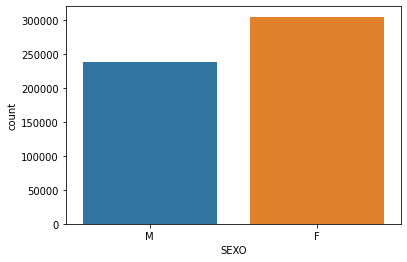

In [29]:
sns.countplot(x='SEXO', data=df2);

In [30]:
df2.shape

(543000, 4)

In [31]:
df2.describe()

,IDADE,INTERNADO,STATUS
count,543000.000000,543000.000000,543000.000000
mean,39.375053,0.055698,0.050834
std,18.074430,0.229338,0.288719
min,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000
75%,52.000000,0.000000,0.000000
max,107.000000,1.000000,2.000000


**Analise de outliers**

In [32]:
import plotly.express as px

In [33]:
boxplot = px.box(df2, y="IDADE")
boxplot.show()

In [34]:
df2.head()

,IDADE,SEXO,INTERNADO,STATUS
0,54,M,0,0
1,15,M,0,0
2,43,M,0,0
3,25,F,0,0
4,58,M,0,0


# Transformar variaveis categoricas em numericas

In [35]:
df2['SEXO'].replace({'F': 0, 'M': 1}, inplace=True)

In [36]:
df2.head()

,IDADE,SEXO,INTERNADO,STATUS
0,54,1,0,0
1,15,1,0,0
2,43,1,0,0
3,25,0,0,0
4,58,1,0,0


# Escalonamento

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)

In [39]:
df2_esc

array([[ 0.80915196,  1.13218734, -0.24286461, -0.17606813],
       [-1.34859447,  1.13218734, -0.24286461, -0.17606813],
       [ 0.20055681,  1.13218734, -0.24286461, -0.17606813],
       ...,
       [ 0.64317146, -0.88324605, -0.24286461,  6.75107719],
       [ 0.86447879, -0.88324605, -0.24286461,  6.75107719],
       [ 1.19643978, -0.88324605, -0.24286461,  6.75107719]])

## K MEANS

In [40]:
df2_esc

array([[ 0.80915196,  1.13218734, -0.24286461, -0.17606813],
       [-1.34859447,  1.13218734, -0.24286461, -0.17606813],
       [ 0.20055681,  1.13218734, -0.24286461, -0.17606813],
       ...,
       [ 0.64317146, -0.88324605, -0.24286461,  6.75107719],
       [ 0.86447879, -0.88324605, -0.24286461,  6.75107719],
       [ 1.19643978, -0.88324605, -0.24286461,  6.75107719]])

In [41]:
df2_esc.shape

(543000, 4)

**Elbow Method**

In [42]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_esc)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

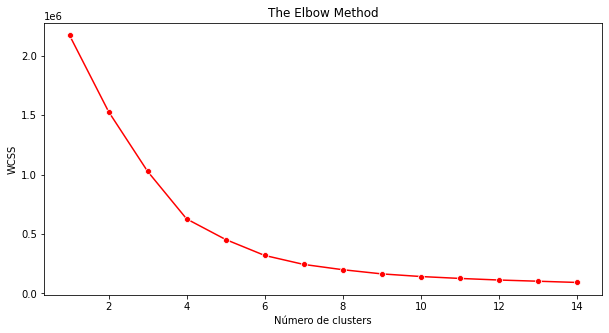

In [44]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 15), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [45]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [46]:
kmeans2 = kmeans.fit(df2_esc)

In [47]:
# Coordenadas dos Centróides
centroides = kmeans2.cluster_centers_
centroides

array([[-0.11753155,  1.13218734, -0.24286461, -0.17438144],
       [-0.02073133, -0.88324605, -0.24286461, -0.17589826],
       [ 0.98444469,  0.22983924,  4.11752041,  0.76916891],
       [ 0.18580147, -0.12883236, -0.20697298,  6.68443576]])

In [48]:
# Inversão do escalonamento
escala.inverse_transform(kmeans2.cluster_centers_)

array([[ 3.72507397e+01,  1.00000000e+00, -1.38715428e-13,
         4.86980172e-04],
       [ 3.90003468e+01,  1.04261044e-12, -1.08447973e-13,
         4.90455389e-05],
       [ 5.71683132e+01,  5.52280865e-01,  1.00000000e+00,
         2.72908102e-01],
       [ 4.27333059e+01,  3.74318346e-01,  8.23129952e-03,
         1.98075934e+00]])

In [49]:
# Classificação dos dados
classificacao2 = kmeans2.labels_
classificacao2

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [50]:
classificacao2[199]

0

In [51]:
agrupamento2 = pd.DataFrame(classificacao2, columns = ['Grupo'])
agrupamento2

,Grupo
0,0
1,0
2,0
3,1
4,0
...,...
542995,3
542996,3
542997,3
542998,3


In [52]:
df4 = pd.concat([df2, agrupamento2],axis=1)
df4

,IDADE,SEXO,INTERNADO,STATUS,Grupo
0,54,1,0,0,0
1,15,1,0,0,0
2,43,1,0,0,0
3,25,0,0,0,1
4,58,1,0,0,0
...,...,...,...,...,...
542995,54,0,0,2,3
542996,80,0,0,2,3
542997,51,0,0,2,3
542998,55,0,0,2,3


In [53]:
df4.iloc[125 , :]

IDADE        55
SEXO          1
INTERNADO     1
STATUS        0
Grupo         2
Name: 125, dtype: int64

In [54]:
grupo0 = df4.loc[df4.Grupo == 0]
grupo0 

,IDADE,SEXO,INTERNADO,STATUS,Grupo
0,54,1,0,0,0
1,15,1,0,0,0
2,43,1,0,0,0
4,58,1,0,0,0
12,32,1,0,0,0
...,...,...,...,...,...
541263,25,1,0,0,0
541265,57,1,0,0,0
541629,61,1,0,0,0
541630,68,1,0,0,0


In [55]:
grupo0.shape

(217668, 5)

## **Agrupamento Hierárquico com PCA**

In [56]:
df2_esc

array([[ 0.80915196,  1.13218734, -0.24286461, -0.17606813],
       [-1.34859447,  1.13218734, -0.24286461, -0.17606813],
       [ 0.20055681,  1.13218734, -0.24286461, -0.17606813],
       ...,
       [ 0.64317146, -0.88324605, -0.24286461,  6.75107719],
       [ 0.86447879, -0.88324605, -0.24286461,  6.75107719],
       [ 1.19643978, -0.88324605, -0.24286461,  6.75107719]])

In [57]:
df2_esc.shape

(543000, 4)

**Componentes Principais**

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components = 2)

In [60]:
df2_pca = pca.fit_transform(df2_esc)

In [61]:
df2_pca

array([[ 0.25763593,  0.87357322],
       [-0.96824474,  1.36609734],
       [-0.08812529,  1.01249028],
       ...,
       [ 3.56408657, -0.92794787],
       [ 3.68981792, -0.97846317],
       [ 3.87841495, -1.05423611]])

In [62]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.33985745, 0.25408331])

In [63]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

0.5939407592266337

**Dendograma**

In [64]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage